In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Step 1: Load the dataset
data = pd.read_csv('penguins.csv')

In [4]:
# Display the first few rows of the dataset
print(data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [5]:
# Step 2: Preprocess the data
data = data.dropna()
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [6]:
# Step 3: Create a linkage matrix for the dendrogram
linkage_matrix = linkage(X, method='ward')

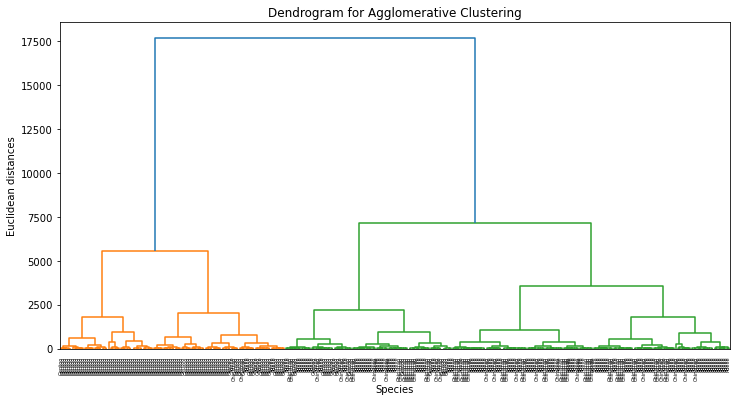

In [7]:
# Step 4: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data['species'].values, leaf_rotation=90)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
# Step 5: Apply Agglomerative Clustering
n_clusters = 3  # Adjust this based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
data['cluster'] = agg_clustering.fit_predict(X)

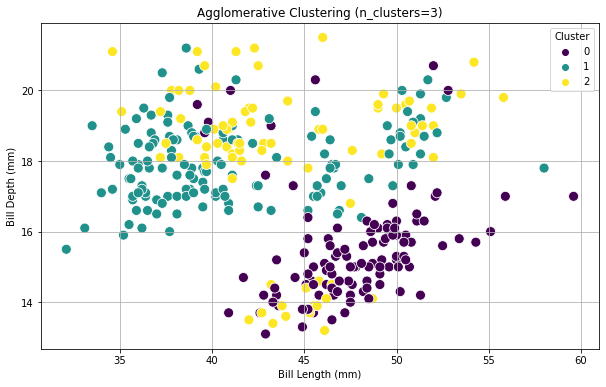

In [9]:
# Step 6: Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='viridis', s=100)
plt.title(f'Agglomerative Clustering (n_clusters={n_clusters})')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Cluster')
plt.grid()
plt.show()